# TP2. Techniques de graphes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

m_raw = pd.read_table("http://www.groupes.polymtl.ca/log6308/Public/citeseer.rtable", sep=" ")
m = pd.read_table("http://www.groupes.polymtl.ca/log6308/Public/citeseer.rtable", sep=" ").values
mm = m.dot(m)

In [2]:
sums = np.sum(m, axis=1).reshape(-1,1)
markov = m*1.0 / sums

/Users/baptisterocca/Documents/utc/GI05_Montreal/LOG6308 syst.de.recom/venv/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in divide
  


In [3]:
print(markov)

[[0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.25 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]]


## Approche par PageRank

In [4]:
def pagerank(M, eps=1.0e-8, d=0.85):
    N = M.shape[1]
    # create a random state
    v = np.random.rand(N, 1)
    v = v / np.linalg.norm(v, 1)
    oldV = np.zeros((N, 1))
    M_chap = (d * M) + (((1 - d) / N) * np.ones((N, N)))
    
    while np.linalg.norm(v - oldV, 2) > eps:
        oldV = v
        v = np.matmul(M_chap, v)
    return v

Nous allons conseiller les articles pointants vers notre article ainsi que les articles vers lesquels le notre pointe. De plus pour ordoner les résultats, nous allons faire un PageRank sur les articles recommandés de manière à avoir un PageRank spécifique au domaine.

In [5]:
index = m_raw.index.get_loc(422908)
out_ = np.argwhere(m[index,:]>0)
in_ = np.argwhere(m[:,index]>0)
total = np.unique(list(in_.flatten())+list(out_.flatten()))

pg = pagerank(markov[:,total][total,:]).flatten()
indexes = np.argsort(pg)[::-1]
indexes = indexes[~np.isnan(pg[indexes])]

suggestions_1 = set(m_raw.index[total[indexes]])

print(suggestions_1)

set([147460, 497542, 98185, 366858, 136975, 155792, 83730, 177173, 466838, 125089, 28323, 289188, 468667, 149673, 496938, 315693, 106034, 83509, 226359, 167226, 7099, 10302, 83263, 322240, 464834, 64835, 17094, 7624, 78418, 79188, 182742, 181463, 131548, 26170, 19422, 110303, 6497, 3170, 17507, 395364, 3175, 34792, 392298, 304747, 120172, 66285, 3950, 297641, 66291, 156791, 124, 139134, 96767])


Nous allons mainenant passer à une approche ne prenant pas en compte un seul pas mais deux de manière à étendre nos recommendations. La méthodologie reste sensiblement la même.

In [6]:
index = m_raw.index.get_loc(422908)
out_ = np.argwhere(mm[index,:]>0)
in_ = np.argwhere(mm[:,index]>0)
total = np.unique(list(in_.flatten())+list(out_.flatten())+list(total))

pg = pagerank(markov[:,total][total,:]).flatten()
indexes = np.argsort(pg)[::-1]
indexes = indexes[~np.isnan(pg[indexes])]

suggestions_2 = set(m_raw.index[total[indexes]])

print(suggestions_2)

set([147460, 177173, 140292, 120860, 295968, 134177, 146468, 384037, 32294, 297641, 206892, 479277, 157742, 106034, 83509, 226359, 26170, 373307, 10302, 97863, 504401, 78418, 3170, 17507, 395364, 3175, 248936, 392298, 304747, 22638, 156791, 325396, 124, 314502, 155792, 58002, 488607, 125089, 425122, 28323, 28329, 129196, 248596, 468667, 322240, 17094, 181463, 110303, 134881, 66285, 50929, 66291, 293625, 70908, 366858, 136975, 83730, 103700, 7960, 26913, 164643, 8484, 296098, 496938, 70445, 35128, 167226, 149820, 83263, 166209, 1347, 449353, 79188, 426325, 53595, 312156, 167774, 6497, 212842, 120172, 3950, 210287, 139134, 53632, 8069, 497542, 98185, 126858, 155019, 48013, 206738, 10563, 225173, 466838, 289188, 113069, 188852, 7099, 464834, 313796, 40391, 7624, 64835, 63437, 315693, 182742, 131548, 19422, 225251, 34792, 399339, 149673, 429561, 422908, 301565, 96767])


## Approche Item-Item

### Cosine

Nous allons conseiller les 10 articles les plus proche par rapport à la mesure de similarité que représente le cosinus.

In [7]:
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

item = m[index].reshape(1,-1)
cosine = cosine_similarity(m,item).reshape(-1)
indexes = np.argsort(cosine)[-11:-1][::-1]
suggestions_3 = set(m_raw.index[indexes])
print(suggestions_3)
print(cosine[indexes])

set([53632, 17507, 497542, 3175, 149673, 70445, 22638, 155792, 466838, 96767])
[0.51449576 0.49507377 0.48507125 0.48507125 0.45834925 0.45834925
 0.43386092 0.42874646 0.42008403 0.39605902]


### Euclidien

Nous allons conseiller les 10 articles les plus proche par rapport à la mesure de similarité que représente la distance euclidienne.

In [8]:
euclidean = euclidean_distances(m,item).reshape(-1)
indexes = np.argsort(euclidean)[1:11]
suggestions_4 = set(m_raw.index[indexes])
print(suggestions_4)

set([53632, 17094, 497542, 149673, 70445, 155792, 8434, 225173, 466838, 96767])


## Interprétation des résultats

In [9]:
print(suggestions_1)

set([147460, 497542, 98185, 366858, 136975, 155792, 83730, 177173, 466838, 125089, 28323, 289188, 468667, 149673, 496938, 315693, 106034, 83509, 226359, 167226, 7099, 10302, 83263, 322240, 464834, 64835, 17094, 7624, 78418, 79188, 182742, 181463, 131548, 26170, 19422, 110303, 6497, 3170, 17507, 395364, 3175, 34792, 392298, 304747, 120172, 66285, 3950, 297641, 66291, 156791, 124, 139134, 96767])


Dans ces résultats, nous avons des articles écris pas des auteurs commun (497542) et d'autre qui ne le sont pas. Nous avons vérifié les 5 premier articles qui semble en effet liés au notre. En effet tous les articles semble parler des automates et des systeme temps réel.

In [10]:
print(suggestions_2.difference(suggestions_1))

set([53632, 140292, 8069, 314502, 129196, 126858, 155019, 48013, 70445, 7960, 58002, 10563, 325396, 225173, 103700, 113069, 120860, 488607, 295968, 134177, 425122, 164643, 146468, 384037, 32294, 206738, 28329, 40391, 206892, 479277, 157742, 188852, 35128, 373307, 149820, 166209, 1347, 313796, 97863, 449353, 296098, 63437, 504401, 429561, 426325, 293625, 8484, 53595, 312156, 167774, 134881, 225251, 248936, 422908, 212842, 399339, 26913, 22638, 210287, 50929, 248596, 70908, 301565])


Nous n'allons ici que verifier la validité de l'ajout d'un pas dans notre algorithme de recommendation en nous assurant qu'ajouter un pas ne rend pas les suggestions moins bonne. Ici encore nous n'avons regardé que les 5 premiere suggestion. Ce qui nous saute au yeux est tout d'abord que les articles suggeré sont beaucoup moins proche de l'article de base. Il n'est plus directement question d'automates et des systeme temps reel. Cependant, les articles tel que celui sur la vérification de model symbolique de systeme a état infinis semblent pertinent. En effet, tout les articles que nous avons vu semble présenter une facette commune avec notre article de base. C'est souvent la validité d'un des outils mathématique employé dans notre article de base ou dans ces articles directement similaire qui y est traité.

In [11]:
print(suggestions_3)

set([53632, 17507, 497542, 3175, 149673, 70445, 22638, 155792, 466838, 96767])


Nous notons ici que tout les résultat de cette approche sont présents dans l'approche n°2. En effet il n'est aucun article dans suggestions_3 qui n'est pas présent dans suggestions_2. Nous avons tout de même regardé les premier articles que nous n'avions pas lu lors des vérifications précédente et y avons trouvé des articles sur les automates(497542) et sur le raisonement temps-réel (3175). Tout ces résultats semble acceptable. Nous n'avons cependant retiré que 10 articles pour le moment.

In [12]:
print(suggestions_4)

set([53632, 17094, 497542, 149673, 70445, 155792, 8434, 225173, 466838, 96767])


Nous notons ici que tout les résultat de cette approche sont présents dans l'approche n°2 sauf pour l'article n°8434. Nous allons donc vérifier si cet ajout est pertinent. Cet article traite des diagrammes états-transitions. Cette recommendation n'est pas dénuée de sens mais semble tout de même moins pertinente que les recommendation approtée par l'approche du cosinus. C'est donc cette approche que nous tenteront d'optimiser avec la cross validation.

In [13]:
common = suggestions_1 & suggestions_2 & suggestions_3 & suggestions_4
print(common)

set([155792, 149673, 466838, 497542, 96767])


Nous voulions voir quels articles resortaient dans toutes les suggestion et avons donc tenté de regrouper toute ces méthodes. Nous y trouvons des articles tel que "Model-Checking in Dense Real-time" et "Compiling Real-Time Specifications into Extended Automata" qui sont directement en lien avec notre article de base mais aussi des articles tel que "Back to the Future: Towards a Theory of Timed Regular Languages", "Sooner is Safer than Later", "Marked Point Models for Facies Units Conditioned on Well Data" dont le recoupement avec notre article est plus exotique. Nous noterons toutefois que cet état de fait est particulièrement interessant car, comme nous l'avons vu en cours, il est nécessaire pour faire de bonne recommendation d'avoir des recommendation variées.

## La cross-validation au service de l'approche Item-Item

Nous n'allons maintenant plus prendre un nombre fixe de voisin mais allons chercher par cross-validation la limite à partir de laquelle deux article seront considérés comme proche au sens du cosinus.

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc3 in position 2: ordinal not in range(128)

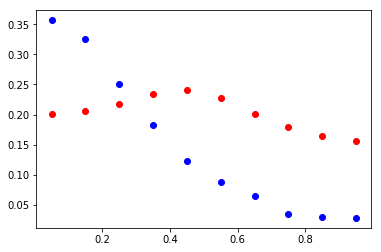

In [15]:
ptx, pty = [], []
tresholds = np.linspace(0.05,0.95,10)
for treshold in tresholds:
    meanRap, meanPrec, nb = 0,0,0
    for i in range(len(m)):
        item = m[i].reshape(1,-1)
        if np.sum(item) == 0:
            continue
        
        out_ = np.argwhere(m[i,:]>0)
        in_ = np.argwhere(m[:,i]>0)
        total = np.unique(list(in_.flatten())+list(out_.flatten()))
        out_ = np.argwhere(mm[i,:]>0)
        in_ = np.argwhere(mm[:,i]>0)
        total = np.unique(list(in_.flatten())+list(out_.flatten())+list(total))
        goodSuggestions = set(total)
        
        cosine = cosine_similarity(m,item).reshape(-1)
        indexes = np.argwhere(cosine>=treshold).flatten()
        ourSuggestions = set(indexes)
        
        meanPrec += len(goodSuggestions & ourSuggestions)*1.0/len(ourSuggestions)
        meanRap += len(goodSuggestions & ourSuggestions)*1.0/len(goodSuggestions)
        nb += 1
    #print(treshold)
    #print(len(goodSuggestions & ourSuggestions)*1.0/len(goodSuggestions))
    ptx.append(meanRap/nb)
    pty.append(meanPrec/nb)
      
plt.plot(tresholds, ptx, 'bo')
plt.plot(tresholds, pty, 'ro')
plt.legend(['Rappel moyen', 'Précision moyenne'])
plt.xlabel('Valeur maximale de cosine acceptée')
plt.ylabel('Rappel/Precision')
plt.show()

Nous voyons ici que nous devrons considérer deux article comme proche lorsque le cosinus entre ces deux articles sera inferieur supperieur à 0.45 pour un précision moyenne de 24% et un rappel moyen de 12%. Ces résultats ne sont pas très haut ce qui nous laisse penser que l'approche item-item n'est pas la plus interessante pour ce genre de dataset. notons que les articles considérés comme bonne réponse sont ceux présent "à deux pas" du notre.